# Applied Data Science Capstone Project

Week 3: Webscraping information about Toronto and the neighborhoods

Import Libraries

In [3]:
pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 6.0 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import folium

Obtaining the data from Wikipedia

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html_data = requests.get(url).text

Working with the data

In [5]:
soup = BeautifulSoup(html_data, 'html.parser')

In [6]:
#separate table from html data
table = soup.find('table')

#start with an empty table, sort through the table rows, create the dictionaries and save them to the list
pc_table = []

for tr in table.find_all('td'):
    cell = {} #cell refers to the cell in the table that we will be drawing the information from where each cell has a zipcode, borough, and assosciated neighborhoods
    if tr.span.text == 'Not assigned':
        pass
    else:
        cell['Postal Code'] = tr.p.text[:3]
        cell['Borough'] = (tr.span.text).split('(')[0]
        cell['Neighborhood'] = ((((tr.span.text).split('(')[1]).replace(')', ' ')).replace(' /', ',')).strip(' ')
        pc_table.append(cell)

In [7]:
df = pd.DataFrame(pc_table)
df

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East TorontoBusiness reply mail Processing Cen...,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [8]:
df.shape #How many rows and columns do we have?

(103, 3)

In [9]:
df['Borough'] = df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade': 'Downtown Toronto Stn A',
                                       'East TorontoBusiness reply mail Processing Centre969 Eastern': 'East Toronto Business',
                                       'East YorkEast Toronto': 'East York/East Toronto',
                                       'MississaugaCanada Post Gateway Processing Centre': 'Mississauga'})

In [10]:
display(df)

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [14]:
df.head(12)

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [11]:
df.shape

(103, 3)

# Geo Coordinates for Toronto Postal Codes



In [20]:
place = 'Toronto, Ontario, Canada'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(place)
latitude_toronto = location.latitude
longitude_toronto = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude_toronto, longitude_toronto))

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


In [21]:
#Getting coordinates for each zipcode using geocoder
coordinates = {}
zipcodes = list(df['Postal Code'])

for zipcode in zipcodes:
        
    geolocator = Nominatim(user_agent = 'toronto_explorer')

    location = geolocator.geocode('{}, Toronto, Ontario'.format(zipcode))
    
    try:
        latitude = location.latitude    
    except Exception:
        latitude = 'NaN'
    
    try:
        longitude = location.longitude
    except Exception:
        longitude = 'NaN'

    coordinates[zipcode] = [latitude, longitude]
coord_df = pd.DataFrame(coordinates)

In [29]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_id = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='enter ibm_api_key_id',
    ibm_auth_endpoint="enter ibm_auth_endpoint",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_id.get_object(Bucket='bucket',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [30]:
#Merge the dataframes together on the Postal Code column
df_geo = df.merge(geo_coord, how='right', on=['Postal Code'])
df_geo.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


# Exploring the City of Toronto using Foursquare API

In [31]:
# Create a map of Toronto using latitude and longitude values
toronto_map = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=11)

# add markers to map
for lat, long, label in zip(df_geo['Latitude'], df_geo['Longitude'], df_geo['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#9932CC',
        fill_opacity=1.0,
        parse_html=False).add_to(toronto_map)  
    
toronto_map

In [33]:
CLIENT_ID = 'YDU0TAUGLIOGWFPFAOHGKQWLTZBLXGAQKXG2DJ14MMXKYAJE' # your Foursquare ID
CLIENT_SECRET = 'NYDNSEZDAIY5KT1IM2DHRZKIDRRPNEHGLTV3KB4SDO5P1Q3G' # your Foursquare Secret
VERSION = '20180605' #Foursquare API version
LIMIT = 100 #A default Foursquare API limit value

Exploring Toronto

In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, long in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            long, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues) #returns a dataframe of venues near each neighborhood

# Exploring Neighborhoods in Toronto

In [35]:
toronto_venues = getNearbyVenues(names=df_geo['Neighborhood'],
                                latitudes=df_geo['Latitude'],
                                longitudes=df_geo['Longitude']
                                )

In [36]:
toronto_venues.shape

(1974, 7)

In [37]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
1,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [38]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,"Willowdale, Newtonbrook",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,York Mills West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    freq = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    freq.columns = ['venue','freq']
    freq = freq.iloc[1:]
    freq['freq'] = freq['freq'].astype(float)
    freq = freq.round({'freq': 2})
    print(freq.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0                     Lounge  0.25
1               Skating Rink  0.25
2  Latin American Restaurant  0.25
3             Breakfast Spot  0.25
4              Metro Station  0.00


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.33
1             Gym  0.17
2     Coffee Shop  0.17
3             Pub  0.17
4  Sandwich Place  0.17


----Bathurst Manor, Wilson Heights, Downsview North----
            venue  freq
0     Coffee Shop  0.11
1            Bank  0.11
2            Park  0.06
3   Shopping Mall  0.06
4  Sandwich Place  0.06


----Bayview Village----
                      venue  freq
0                      Café  0.25
1        Chinese Restaurant  0.25
2                      Bank  0.25
3       Japanese Restaurant  0.25
4  Mediterranean Restaurant  0.00


----Bedford Park, Lawrence Manor East----
              venue  freq
0       Coffee Shop  0.08
1        Restaurant  0.08
2  Sushi Restaurant  0.08
3    Sandwich P

            venue  freq
0     Coffee Shop  0.17
1            Café  0.06
2  Sandwich Place  0.05
3             Gym  0.04
4  Clothing Store  0.04


----Rosedale----
               venue  freq
0               Park  0.50
1              Trail  0.25
2         Playground  0.25
3        Yoga Studio  0.00
4  Mobile Phone Shop  0.00


----Roselawn----
                             venue  freq
0                     Home Service  0.33
1          Health & Beauty Service  0.33
2                           Garden  0.33
3               Mexican Restaurant  0.00
4  Molecular Gastronomy Restaurant  0.00


----Rouge Hill, Port Union, Highland Creek----
              venue  freq
0               Bar   1.0
1       Yoga Studio   0.0
2      Liquor Store   0.0
3     Luggage Store   0.0
4  Malay Restaurant   0.0


----Runnymede, Swansea----
                venue  freq
0         Coffee Shop  0.13
1    Sushi Restaurant  0.06
2                Café  0.06
3  Italian Restaurant  0.06
4                 Pub  0.06


----Ru

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [42]:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Skating Rink,Lounge,Breakfast Spot,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant
1,"Alderwood, Long Branch",Pizza Place,Gym,Sandwich Place,Pub,Coffee Shop,German Restaurant,Drugstore,Doner Restaurant,Dog Run,Distribution Center
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Park,Sushi Restaurant,Grocery Store,Gas Station,Fried Chicken Joint,Ice Cream Shop,Diner,Pharmacy
3,Bayview Village,Chinese Restaurant,Café,Bank,Japanese Restaurant,Women's Store,Diner,Discount Store,Distribution Center,Dog Run,Dessert Shop
4,"Bedford Park, Lawrence Manor East",Restaurant,Sandwich Place,Coffee Shop,Sushi Restaurant,Thai Restaurant,Indian Restaurant,Butcher,Café,Fast Food Restaurant,Italian Restaurant


# Clustering Neighborhoods

In [43]:
def calculate_WSS(points, max_k):
  sse = []
  for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters = k).fit(points)
    sse.append(kmeans.inertia_)
  return sse

In [44]:
#Gather corresponding venue latitudes and venue longitudes together
n_lats = list(toronto_venues['Neighborhood Latitude'])
n_longs = list(toronto_venues['Neighborhood Longitude'])
points = np.zeros((len(n_lats), 2))
for j in range(len(n_lats)):
    points[j, 0] = n_lats[j]
    points[j, 1] = n_longs[j]

In [45]:
WSS = calculate_WSS(points, 10)
print(WSS)

[9.293541876286692, 5.987137534114106, 3.201015600768879, 2.372143715523458, 1.939011771790611, 1.603817407344028, 1.2722173876031726, 1.0966784437730406, 0.9537527426433713, 0.8108018906301546]


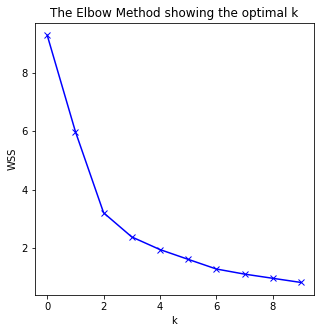

In [46]:
#Elbow Method Graph
K = range(0,10)
plt.figure(figsize=(5,5))
plt.plot(K, WSS, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [47]:
#Set number of clusters
k = 3

#Drop Neighborhood Column
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', axis=1)

#Run k-means clustering
kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
kmeans.fit(toronto_grouped_clustering)

#Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [48]:
#Add clustering labels to dataframe
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_geo

#Merge toronto_grouped with df_geo to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,Park,Food & Drink Shop,Fast Food Restaurant,Women's Store,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,Coffee Shop,Pizza Place,Portuguese Restaurant,Hockey Arena,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.0,Coffee Shop,Pub,Park,Bakery,Café,Restaurant,Asian Restaurant,Chocolate Shop,Performing Arts Venue,Event Space
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1.0,Clothing Store,Furniture / Home Store,Miscellaneous Shop,Coffee Shop,Boutique,Vietnamese Restaurant,Gift Shop,Distribution Center,Dessert Shop,Dim Sum Restaurant
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,1.0,Coffee Shop,Sushi Restaurant,Burrito Place,Gym,Diner,Restaurant,Persian Restaurant,Park,Mexican Restaurant,Japanese Restaurant


In [49]:
for (col, col_data) in toronto_merged.iteritems():
    print("NaN values in ", col, ": ", toronto_merged[col].isnull().sum())

NaN values in  Postal Code :  0
NaN values in  Borough :  0
NaN values in  Neighborhood :  0
NaN values in  Latitude :  0
NaN values in  Longitude :  0
NaN values in  Cluster Labels :  2
NaN values in  1st Most Common Venue :  2
NaN values in  2nd Most Common Venue :  2
NaN values in  3rd Most Common Venue :  2
NaN values in  4th Most Common Venue :  2
NaN values in  5th Most Common Venue :  2
NaN values in  6th Most Common Venue :  2
NaN values in  7th Most Common Venue :  2
NaN values in  8th Most Common Venue :  2
NaN values in  9th Most Common Venue :  2
NaN values in  10th Most Common Venue :  2


In [51]:
toronto_merged.loc[(toronto_merged['Cluster Labels'].isnull())]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,M1X,Scarborough,Upper Rouge,43.836125,-79.205636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
toronto_merged.drop([5, 45, 95], axis=0, inplace=True)

In [53]:
for (col, col_data) in toronto_merged.iteritems():
    print("NaN values in ", col, ": ", toronto_merged[col].isnull().sum())

NaN values in  Postal Code :  0
NaN values in  Borough :  0
NaN values in  Neighborhood :  0
NaN values in  Latitude :  0
NaN values in  Longitude :  0
NaN values in  Cluster Labels :  1
NaN values in  1st Most Common Venue :  1
NaN values in  2nd Most Common Venue :  1
NaN values in  3rd Most Common Venue :  1
NaN values in  4th Most Common Venue :  1
NaN values in  5th Most Common Venue :  1
NaN values in  6th Most Common Venue :  1
NaN values in  7th Most Common Venue :  1
NaN values in  8th Most Common Venue :  1
NaN values in  9th Most Common Venue :  1
NaN values in  10th Most Common Venue :  1


# Comparing clusters

In [54]:
centroids = kmeans.cluster_centers_
clat = []
clong = []
for center in centroids:
    clat.append(center[0])
    clong.append(center[1])

In [55]:
#Acquire all labels
cluster_labels = toronto_merged['Cluster Labels'].unique()

In [59]:
#Create map
map_clusters = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=11)

#Set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    try:
        cluster = int(cluster)
        
    except Exception:
        pass
        
    label = folium.Popup(str(poi) + ', ' + ', Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)
        
for clat_, clong_, cluster_label in zip(clat, clong, cluster_labels):
        clabel = folium.Popup('Centroid ' + str(cluster_label), parse_html=True)
        folium.CircleMarker(
            [clat_, clong_],
            radius=5,
            popup=clabel,
            color='black',
            fill=True,
            fill_color='#FFFF00',
            fill_opacity=1.0,
            parse_html=False).add_to(map_clusters)
       
map_clusters

In [60]:
#Cluster 0
Cluster_0 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]
Cluster_0

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,Park,Food & Drink Shop,Fast Food Restaurant,Women's Store,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant
12,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0.0,Bar,Women's Store,Fabric Shop,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant
21,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512,0.0,Park,Bar,Women's Store,Golf Course,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant
40,M3K,North York,Downsview East,43.737473,-79.464763,0.0,Park,Airport,Business Service,Electronics Store,Escape Room,Eastern European Restaurant,Drugstore,Donut Shop,Deli / Bodega,Dog Run
46,M3L,North York,Downsview West,43.739015,-79.506944,0.0,Park,Grocery Store,Bank,Shopping Mall,Dog Run,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Donut Shop
49,M6L,North York,"North Park, Maple Leaf Park, Upwood Park",43.713756,-79.490074,0.0,Park,Construction & Landscaping,Bakery,Basketball Court,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
52,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493,0.0,Park,Women's Store,Deli / Bodega,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
61,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0.0,Park,Bus Line,Swim School,Department Store,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant
68,M5P,Central Toronto,Forest Hill North & West,43.696948,-79.411307,0.0,Trail,Jewelry Store,Sushi Restaurant,Park,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Deli / Bodega
77,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724,0.0,Park,Bus Line,Pizza Place,Sandwich Place,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Women's Store


In [61]:
#Cluster 1
Cluster_1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]
Cluster_1

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,Coffee Shop,Pizza Place,Portuguese Restaurant,Hockey Arena,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.0,Coffee Shop,Pub,Park,Bakery,Café,Restaurant,Asian Restaurant,Chocolate Shop,Performing Arts Venue,Event Space
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1.0,Clothing Store,Furniture / Home Store,Miscellaneous Shop,Coffee Shop,Boutique,Vietnamese Restaurant,Gift Shop,Distribution Center,Dessert Shop,Dim Sum Restaurant
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,1.0,Coffee Shop,Sushi Restaurant,Burrito Place,Gym,Diner,Restaurant,Persian Restaurant,Park,Mexican Restaurant,Japanese Restaurant
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,1.0,Fast Food Restaurant,Women's Store,Event Space,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,M5X,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,1.0,Coffee Shop,Café,Sandwich Place,Hotel,Gym,Japanese Restaurant,Bank,Sushi Restaurant,Restaurant,Deli / Bodega
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,1.0,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Coffee Shop,Pub,Fast Food Restaurant,Indian Restaurant,Burrito Place,Mediterranean Restaurant
100,M7Y,East Toronto Business,Enclave of M4L,43.662744,-79.321558,1.0,Light Rail Station,Smoke Shop,Farmers Market,Skate Park,Park,Gym / Fitness Center,Restaurant,Brewery,Comic Shop,Garden Center
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,1.0,Baseball Field,Women's Store,Fabric Shop,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant


In [62]:
#Cluster2
Cluster_2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]
Cluster_2

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,M6B,North York,Glencairn,43.709577,-79.445073,2.0,Park,Asian Restaurant,Hookah Bar,Convenience Store,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
35,M4J,East York/East Toronto,The Danforth East,43.685347,-79.338106,2.0,Park,Convenience Store,Women's Store,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
64,M9N,York,Weston,43.706876,-79.518188,2.0,Convenience Store,Women's Store,Department Store,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant
66,M2P,North York,York Mills West,43.752758,-79.400049,2.0,Park,Convenience Store,Women's Store,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
